In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
dups = df.duplicated()

In [6]:
df[dups]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [7]:
df.query("person_age==23 & person_home_ownership == 'RENT' & loan_int_rate == 10.36")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
207,23,74000,RENT,3.0,MEDICAL,B,25000,10.36,1,0.34,N,3
345,23,150000,RENT,4.0,EDUCATION,B,25000,10.36,0,0.17,N,3
1367,23,33600,RENT,2.0,PERSONAL,B,1000,10.36,0,0.03,N,2
1654,23,10008,RENT,NaN,DEBTCONSOLIDATION,B,1600,10.36,1,0.16,N,2
2864,23,58800,RENT,7.0,PERSONAL,B,3000,10.36,1,0.05,N,4
3795,23,30000,RENT,0.0,DEBTCONSOLIDATION,B,4000,10.36,0,0.13,N,3
3796,23,30000,RENT,0.0,MEDICAL,B,4000,10.36,0,0.13,N,4
4475,23,48600,RENT,2.0,DEBTCONSOLIDATION,B,4800,10.36,0,0.10,N,3
10759,23,34000,RENT,7.0,EDUCATION,B,10000,10.36,1,0.29,N,4
14357,23,45000,RENT,2.0,PERSONAL,B,14500,10.36,1,0.32,N,4


In [8]:
df.shape

(32581, 12)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(32416, 12)

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from lightgbm import LGBMClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [12]:
X, X_test, y, y_test = train_test_split(df.drop('loan_status', axis=1), df['loan_status'],
                                        random_state=0,  test_size=0.3, stratify=df['loan_status'],
                                        shuffle=True)

In [14]:
df["loan_status"].value_counts(normalize=True)

,proportion
loan_status,
0,0.781312
1,0.218688


In [15]:
y.value_counts(normalize=True)

,proportion
loan_status,
0,0.781323
1,0.218677


In [16]:
np.round(X.isna().sum()* 100 / X.shape[0], 2)

,0
person_age,0.00
person_income,0.00
person_home_ownership,0.00
person_emp_length,2.84
loan_intent,0.00
loan_grade,0.00
loan_amnt,0.00
loan_int_rate,9.66
loan_percent_income,0.00
cb_person_default_on_file,0.00


In [17]:
X.shape

(22691, 11)

In [18]:
X.dropna()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
8224,22,56004,MORTGAGE,6.0,MEDICAL,B,6000,11.86,0.11,N,3
10004,25,82000,RENT,2.0,MEDICAL,A,9200,6.03,0.11,N,3
21434,29,48000,MORTGAGE,8.0,VENTURE,A,4500,5.42,0.09,N,6
14135,25,100000,MORTGAGE,9.0,EDUCATION,B,8000,10.25,0.08,N,3
15976,24,69996,RENT,3.0,HOMEIMPROVEMENT,B,2500,12.53,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...
23921,29,67422,MORTGAGE,13.0,EDUCATION,B,12800,11.49,0.19,N,8
27428,34,128000,MORTGAGE,14.0,HOMEIMPROVEMENT,A,12325,8.49,0.10,N,5
24358,27,72000,OWN,2.0,EDUCATION,B,12000,9.99,0.17,N,9
2544,23,30000,RENT,0.0,MEDICAL,A,3000,5.79,0.10,N,3


In [19]:
X[['person_income', 'loan_amnt', 'loan_percent_income']].head()

,person_income,loan_amnt,loan_percent_income
8224,56004,6000,0.11
10004,82000,9200,0.11
21434,48000,4500,0.09
14135,100000,8000,0.08
13979,60000,14000,0.23


In [20]:
X.drop('loan_percent_income', axis=1, inplace=True)
X_test.drop('loan_percent_income', axis=1, inplace=True)

In [21]:
for col in X:
    print(col, '--->', X[col].nunique())
    if X[col].nunique()<25:
        print(X[col].value_counts(normalize=True)*100)
    print()

person_age ---> 57

person_income ---> 3394

person_home_ownership ---> 4
person_home_ownership
RENT        50.442907
MORTGAGE    41.346789
OWN          7.879776
OTHER        0.330528
Name: proportion, dtype: float64

person_emp_length ---> 36

loan_intent ---> 6
loan_intent
EDUCATION            19.968269
MEDICAL              18.857697
VENTURE              17.597285
PERSONAL             16.786391
DEBTCONSOLIDATION    15.913798
HOMEIMPROVEMENT      10.876559
Name: proportion, dtype: float64

loan_grade ---> 7
loan_grade
A    32.722225
B    32.404918
C    19.897757
D    11.052840
E     3.001190
F     0.744789
G     0.176281
Name: proportion, dtype: float64

loan_amnt ---> 690

loan_int_rate ---> 342

cb_person_default_on_file ---> 2
cb_person_default_on_file
N    82.499669
Y    17.500331
Name: proportion, dtype: float64

cb_person_cred_hist_length ---> 29



In [22]:
X.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length
count,22691.000000,2.269100e+04,22047.000000,22691.000000,20500.000000,22691.000000
mean,27.681107,6.593084e+04,4.815258,9621.922789,11.020260,5.774007
std,6.313691,6.491777e+04,4.110758,6362.900120,3.233723,4.044089
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,4.000000
75%,30.000000,7.900000e+04,7.000000,12300.000000,13.470000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,30.000000


In [23]:
num_cols = [col for col in X if X[col].dtypes != 'O']
num_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'cb_person_cred_hist_length']

In [24]:
import seaborn as sns

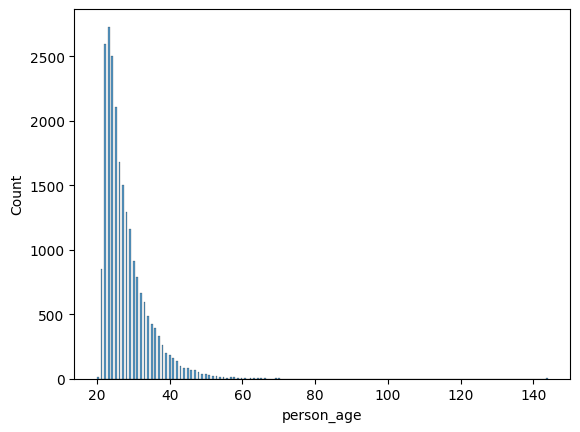

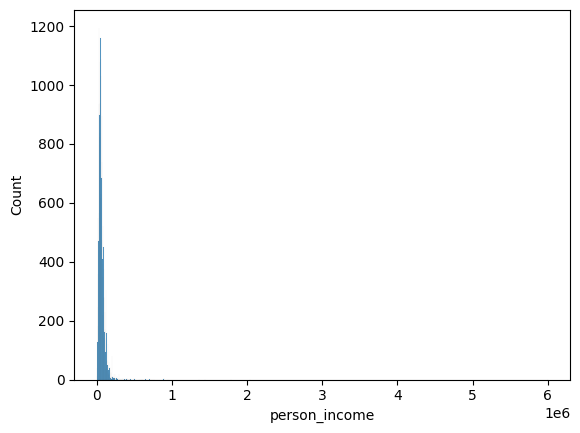

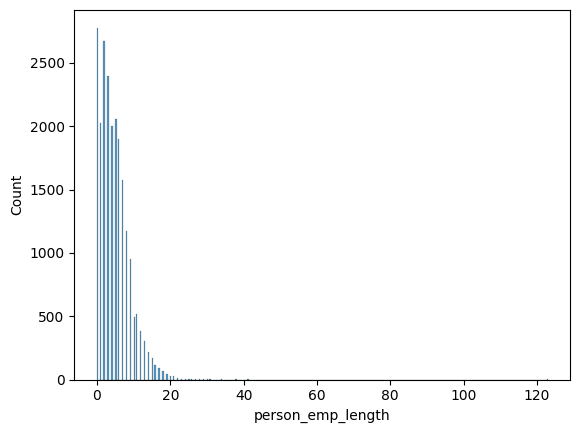

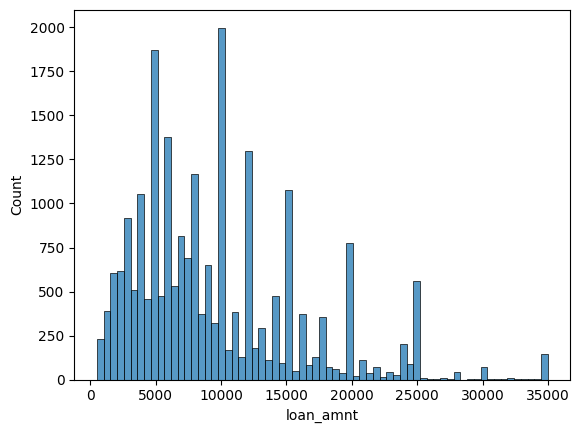

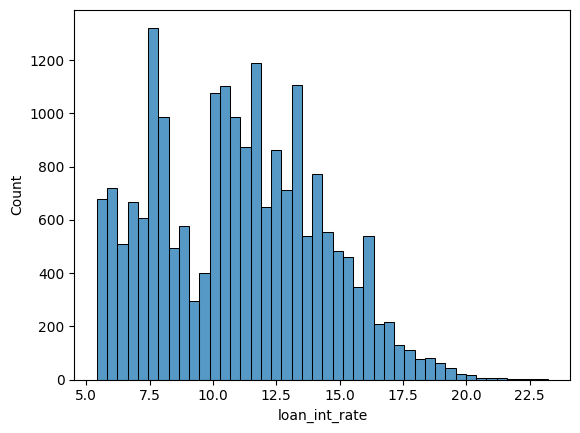

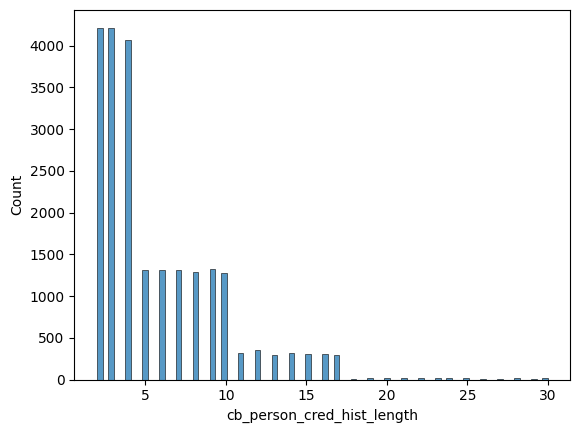

In [25]:

for col in num_cols:
    sns.histplot(X[col])
    plt.show()

In [26]:
X.loc[X['person_age']>=70, :]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length
32385,70,44000,MORTGAGE,3.0,PERSONAL,C,7000,11.66,N,24
32355,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,N,25
32532,70,132000,MORTGAGE,0.0,PERSONAL,A,14000,NaN,N,24
32334,70,30000,RENT,0.0,DEBTCONSOLIDATION,D,1000,17.49,Y,21
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,Y,19
32416,94,24000,RENT,1.0,MEDICAL,C,6500,NaN,N,27
32422,80,64000,RENT,7.0,MEDICAL,B,6800,11.71,N,25
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,N,2
32521,73,39240,RENT,0.0,MEDICAL,B,1800,12.53,N,21
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,N,3


In [27]:
X.shape

(22691, 10)

In [28]:
X.loc[X['person_emp_length']>=62, :]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,Y,3


In [29]:
df.query("person_age<=person_emp_length+14")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [30]:
X = X.loc[(X['person_emp_length']<62) | (X['person_emp_length'].isna()), :]

In [31]:
y = y[X.index]

In [32]:
cat_cols = [col for col in X if X[col].dtypes == 'O']
cat_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [33]:
#create pipeline we are passing two succesors 1. impute: removing missing values 2. scale: scale the entire columns data

In [34]:
num_pipe = Pipeline([
    ('impute', IterativeImputer()),
    ('scale', StandardScaler()),
])

In [35]:
ct = ColumnTransformer([
    ('num_pipe', num_pipe, num_cols),
    ('cat_cols', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_cols)
], remainder='passthrough')

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [37]:
grid = {
    RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced'):
    {'model__n_estimators':[300,400,500],
     'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0),
                                        KNeighborsRegressor()]},

    LGBMClassifier(class_weight='balanced', random_state=0, n_jobs=-1):
    {'model__n_estimators':[300,400,500],
     'model__learning_rate':[0.001,0.01,0.1,1,10],
     'model__boosting_type': ['gbdt', 'goss', 'dart'],
     'coltf__num_pipe__impute__estimator':[LinearRegression(), RandomForestRegressor(random_state=0),
                                        KNeighborsRegressor()]},
}

In [38]:
for clf , param in grid.items():
    print(clf)
    print("-"*40)
    print(param)
    print("-"*40)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0)
----------------------------------------
{'model__n_estimators': [300, 400, 500], 'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0), KNeighborsRegressor()]}
----------------------------------------
LGBMClassifier(class_weight='balanced', n_jobs=-1, random_state=0)
----------------------------------------
{'model__n_estimators': [300, 400, 500], 'model__learning_rate': [0.001, 0.01, 0.1, 1, 10], 'model__boosting_type': ['gbdt', 'goss', 'dart'], 'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0), KNeighborsRegressor()]}
----------------------------------------


In [39]:
full_df =  pd.DataFrame()
best_algos = {}

In [40]:
for clf , param in grid.items():
    pipe = Pipeline([
        ("coltf" , ct),
        ("model", clf)
    ])
    gs =  RandomizedSearchCV(estimator=pipe , param_distributions=param, scoring="accuracy" , n_jobs=-1 , verbose=3 , n_iter=3 , random_state=0)
    gs.fit(X, y) #3*5

    all_res = pd.DataFrame(gs.cv_results_)

    temp =  all_res.loc[:,["params" , "mean_test_score"]]
    algo_name = str(clf).split('(')[0]
    temp['algo'] = algo_name
    full_df = pd.concat([full_df, temp], ignore_index=True)
    best_algos[algo_name] = gs.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4961, number of negative: 17729
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 22690, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


In [41]:
best_algos

{'RandomForestClassifier': Pipeline(steps=[('coltf',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('num_pipe',
                                                   Pipeline(steps=[('impute',
                                                                    IterativeImputer(estimator=KNeighborsRegressor())),
                                                                   ('scale',
                                                                    StandardScaler())]),
                                                   ['person_age',
                                                    'person_income',
                                                    'person_emp_length',
                                                    'loan_amnt', 'loan_int_rate',
                                                    'cb_person_cred_hist_length']),
                                                  ('cat_cols',
                      

In [42]:
all_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__learning_rate,param_model__boosting_type,param_coltf__num_pipe__impute__estimator,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,35.995956,1.916532,0.150094,0.036575,300,0.001,dart,KNeighborsRegressor(),"{'model__n_estimators': 300, 'model__learning_...",0.863817,0.867783,0.864257,0.866681,0.867783,0.866064,0.001709,1
1,31.827979,1.495105,0.135019,0.036687,300,0.010,dart,LinearRegression(),"{'model__n_estimators': 300, 'model__learning_...",0.868885,0.858969,0.863376,0.867342,0.869987,0.865712,0.004048,2
2,71.639224,12.050908,0.203409,0.068039,300,0.001,gbdt,RandomForestRegressor(random_state=0),"{'model__n_estimators': 300, 'model__learning_...",0.861833,0.850375,0.854561,0.863596,0.871970,0.860467,0.007493,3


In [43]:
full_df.sort_values('mean_test_score', ascending=False)

,params,mean_test_score,algo
0,"{'model__n_estimators': 400, 'coltf__num_pipe_...",0.921155,RandomForestClassifier
2,"{'model__n_estimators': 400, 'coltf__num_pipe_...",0.921022,RandomForestClassifier
1,"{'model__n_estimators': 500, 'coltf__num_pipe_...",0.920626,RandomForestClassifier
3,"{'model__n_estimators': 300, 'model__learning_...",0.866064,LGBMClassifier
4,"{'model__n_estimators': 300, 'model__learning_...",0.865712,LGBMClassifier
5,"{'model__n_estimators': 300, 'model__learning_...",0.860467,LGBMClassifier


In [44]:
random = best_algos["RandomForestClassifier"]
random

Pipeline(steps=[('coltf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer(estimator=KNeighborsRegressor())),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat_cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=400, n_jobs=-1,
                                        random_state=0))])

In [45]:
lgbm = best_algos["LGBMClassifier"]
lgbm

Pipeline(steps=[('coltf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer(estimator=KNeighborsRegressor())),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat_cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file'])])),
                ('model',
                 LGBMClassifier(boosting_type='dart', class_weight='balanced',
                                learning_rate=0.001, n_estimators=300,
                                n_jobs=-1, random_state=0))])

In [46]:
pred_random = random.predict(X_test)

In [47]:
pred_lgbm = lgbm.predict(X_test)

In [48]:
from sklearn.metrics import classification_report , confusion_matrix

In [49]:
report_random =  classification_report(y_test , pred_random)
print(report_random)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7598
           1       0.94      0.69      0.80      2127

    accuracy                           0.92      9725
   macro avg       0.93      0.84      0.88      9725
weighted avg       0.92      0.92      0.92      9725



In [50]:
report_lgbm =  classification_report(y_test , pred_lgbm)
print(report_lgbm)

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      7598
           1       0.67      0.74      0.70      2127

    accuracy                           0.86      9725
   macro avg       0.80      0.82      0.81      9725
weighted avg       0.87      0.86      0.86      9725



In [51]:
random.score(X_test , y_test)

0.9234961439588689

In [52]:
lgbm.score(X_test , y_test)

0.862107969151671

In [53]:
a, b, c = learning_curve(random, X, y, n_jobs=-1, scoring='accuracy')

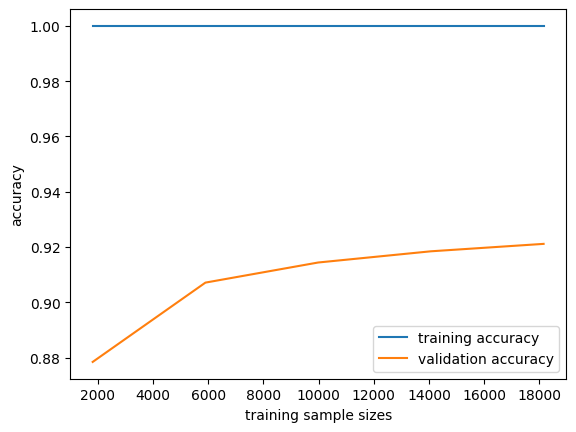

In [54]:
plt.plot(a, b.mean(axis=1), label='training accuracy')
plt.plot(a, c.mean(axis=1),  label='validation accuracy')
plt.xlabel('training sample sizes')
plt.ylabel('accuracy')
plt.legend()

In [55]:
a1, b1, c1 = learning_curve(lgbm, X, y, n_jobs=-1, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


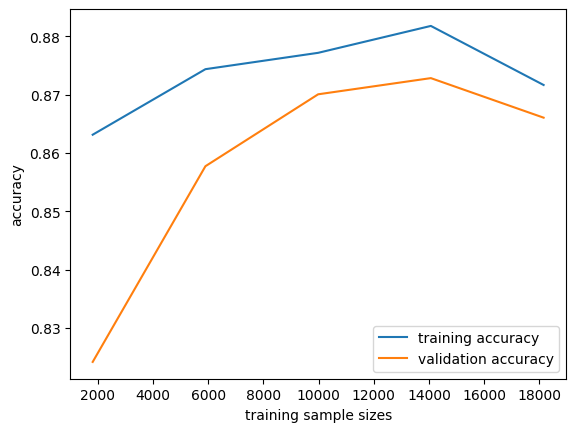

In [56]:
plt.plot(a1, b1.mean(axis=1), label='training accuracy')
plt.plot(a1, c1.mean(axis=1),  label='validation accuracy')
plt.xlabel('training sample sizes')
plt.ylabel('accuracy')
plt.legend()